# Telco Customer Churn Analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data File

In [3]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
# Load the top 5 records of the dataset
data.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape #No of records and attributes

(7043, 21)

In [6]:
data.columns.values #Attributes

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# Get the summary of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Get the data types of the attributes
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that the data type of TotalCharges is object, let's convert it to a numerical feature (float).

In [9]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [10]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking for missing values

In [11]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [12]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 missing records from TotalCharges.

In [13]:
# Let's view the missing records
data[data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the percentage of the missing records are very low (0.16%), deleting the  missing records won't have an affect on the dataframe.

In [14]:
# Delete the missing records
data.dropna(inplace = True)

In [15]:
# Resetting index after records deletion
data.reset_index()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
data.shape

(7032, 21)

In [17]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# Let's drop 'customerID' because it has no impact on the dataframe
data.drop(['customerID'], axis = 1, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Get statistical information on numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Variable Analysis

In [20]:
# Renaming the data values of "SeniorCitizen"
senior_column = {0 : "No", 1 : "Yes"}
data["SeniorCitizen"].replace(senior_column, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Get categorical variables
categoricalVar_List = []
for i in data.columns:
    if (data[i].dtypes == 'object'):
        categoricalVar_List.append(i)

print("Categorical Variables : ")
print(categoricalVar_List)

Categorical Variables : 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [22]:
# Get numerical variables
numericalVar_List = []
for x in data.columns:
    if(data[x].dtypes == 'int64' or data[x].dtypes == 'float64'):
        numericalVar_List.append(x)

print("Numerical Variable : ")
print(numericalVar_List)

Numerical Variable : 
['tenure', 'MonthlyCharges', 'TotalCharges']


In [23]:
# Let's check the number of unique values for each categorical variables
for i in data.columns:
    if (data[i].dtypes == 'object'):
        print("Unique values in", i, "-", data[i].nunique())

Unique values in gender - 2
Unique values in SeniorCitizen - 2
Unique values in Partner - 2
Unique values in Dependents - 2
Unique values in PhoneService - 2
Unique values in MultipleLines - 3
Unique values in InternetService - 3
Unique values in OnlineSecurity - 3
Unique values in OnlineBackup - 3
Unique values in DeviceProtection - 3
Unique values in TechSupport - 3
Unique values in StreamingTV - 3
Unique values in StreamingMovies - 3
Unique values in Contract - 3
Unique values in PaperlessBilling - 2
Unique values in PaymentMethod - 4
Unique values in Churn - 2


In [24]:
for i in data.columns:
    if (data[i].dtypes == 'object'):
        print(i, "\n")
        print(data[i].value_counts(), "\n")

gender 

Male      3549
Female    3483
Name: gender, dtype: int64 

SeniorCitizen 

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64 

Partner 

No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2099
Name: Dependents, dtype: int64 

PhoneService 

Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype:

In [25]:
# Renaming the data values of "PaymentMethod"
payment_column = {"Electronic check": "E-Check", "Mailed check":"Mailed Check", "Bank transfer (automatic)" : "Bank Transfer", "Credit card (automatic)" : "Credit Card"}
data["PaymentMethod"].replace(payment_column, inplace = True)
data["PaymentMethod"]

0             E-Check
1        Mailed Check
2        Mailed Check
3       Bank Transfer
4             E-Check
            ...      
7038     Mailed Check
7039      Credit Card
7040          E-Check
7041     Mailed Check
7042    Bank Transfer
Name: PaymentMethod, Length: 7032, dtype: object

In [26]:
categoricalVar_List_copy = categoricalVar_List.copy()
categoricalVar_List_copy.remove('Churn')

### Distribution of Categorical Features

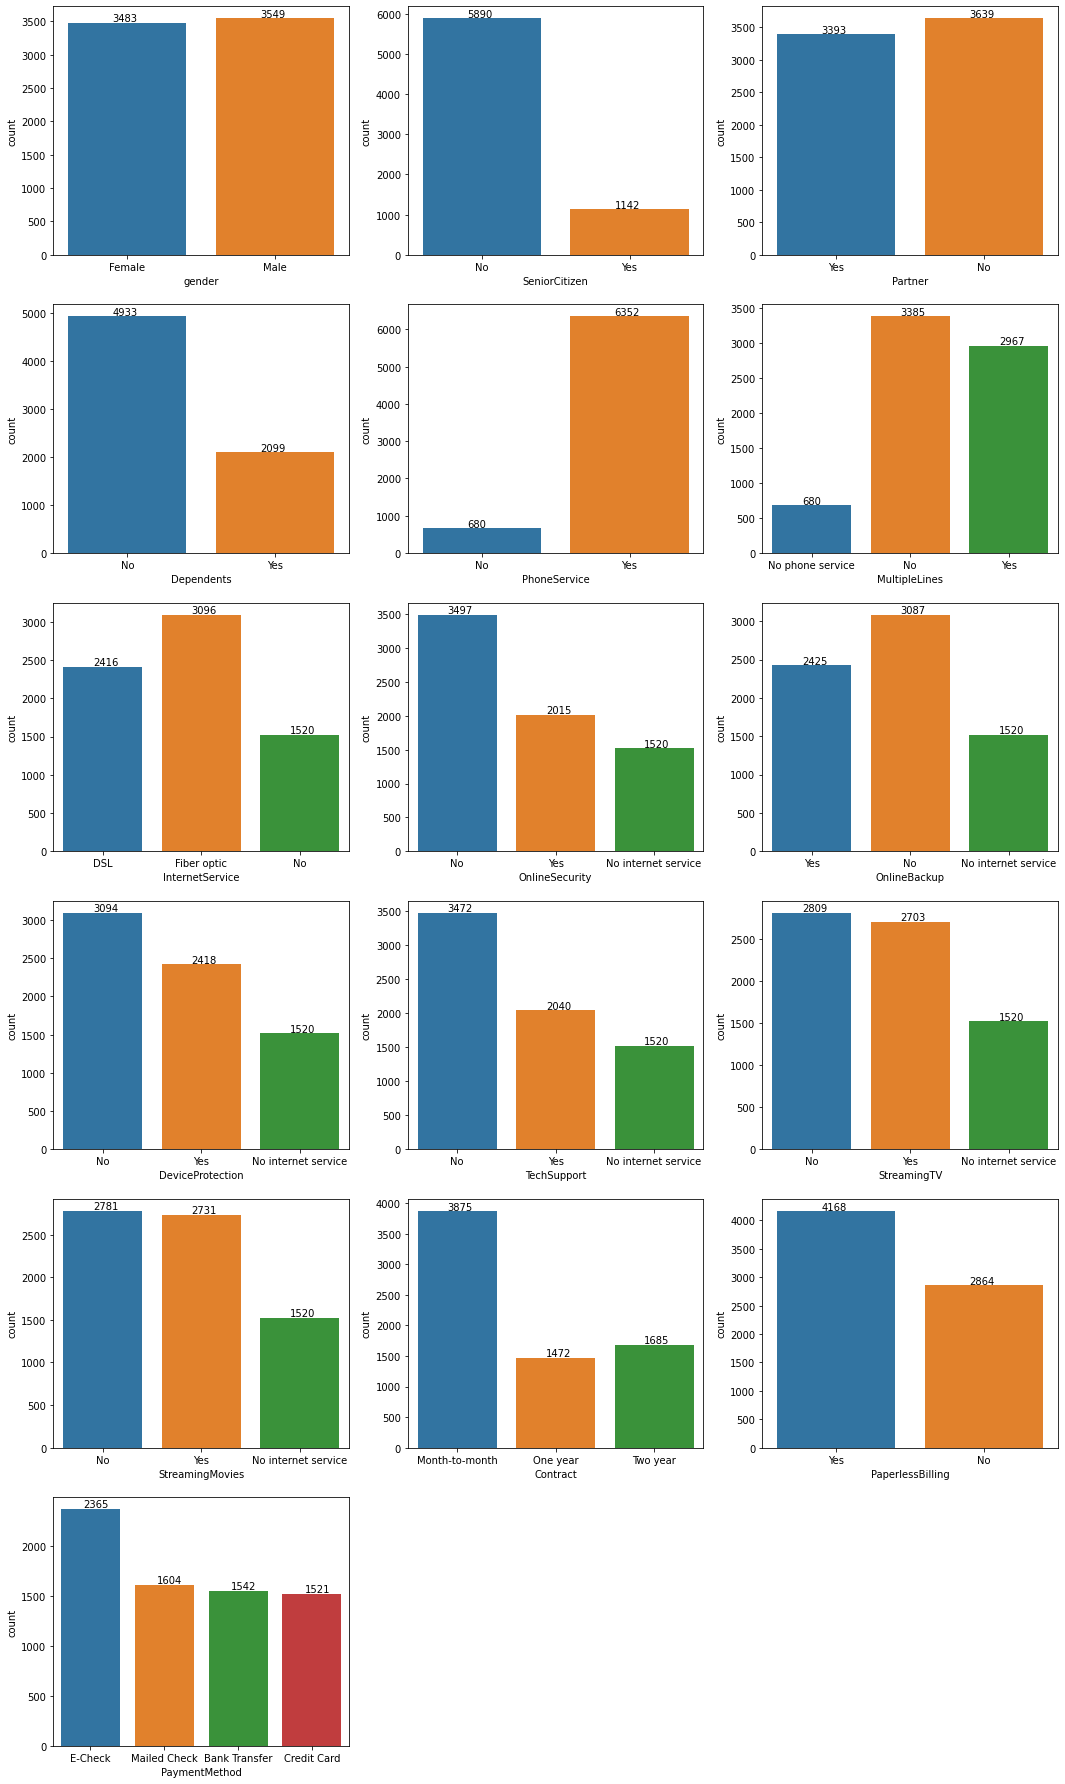

In [27]:
plt.figure(figsize=(18,32))
for i, j in enumerate(categoricalVar_List_copy):
    plt.subplot(6,3, i+1)
    ax = sns.countplot(x = j, data = data)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+20), fontsize = 10)

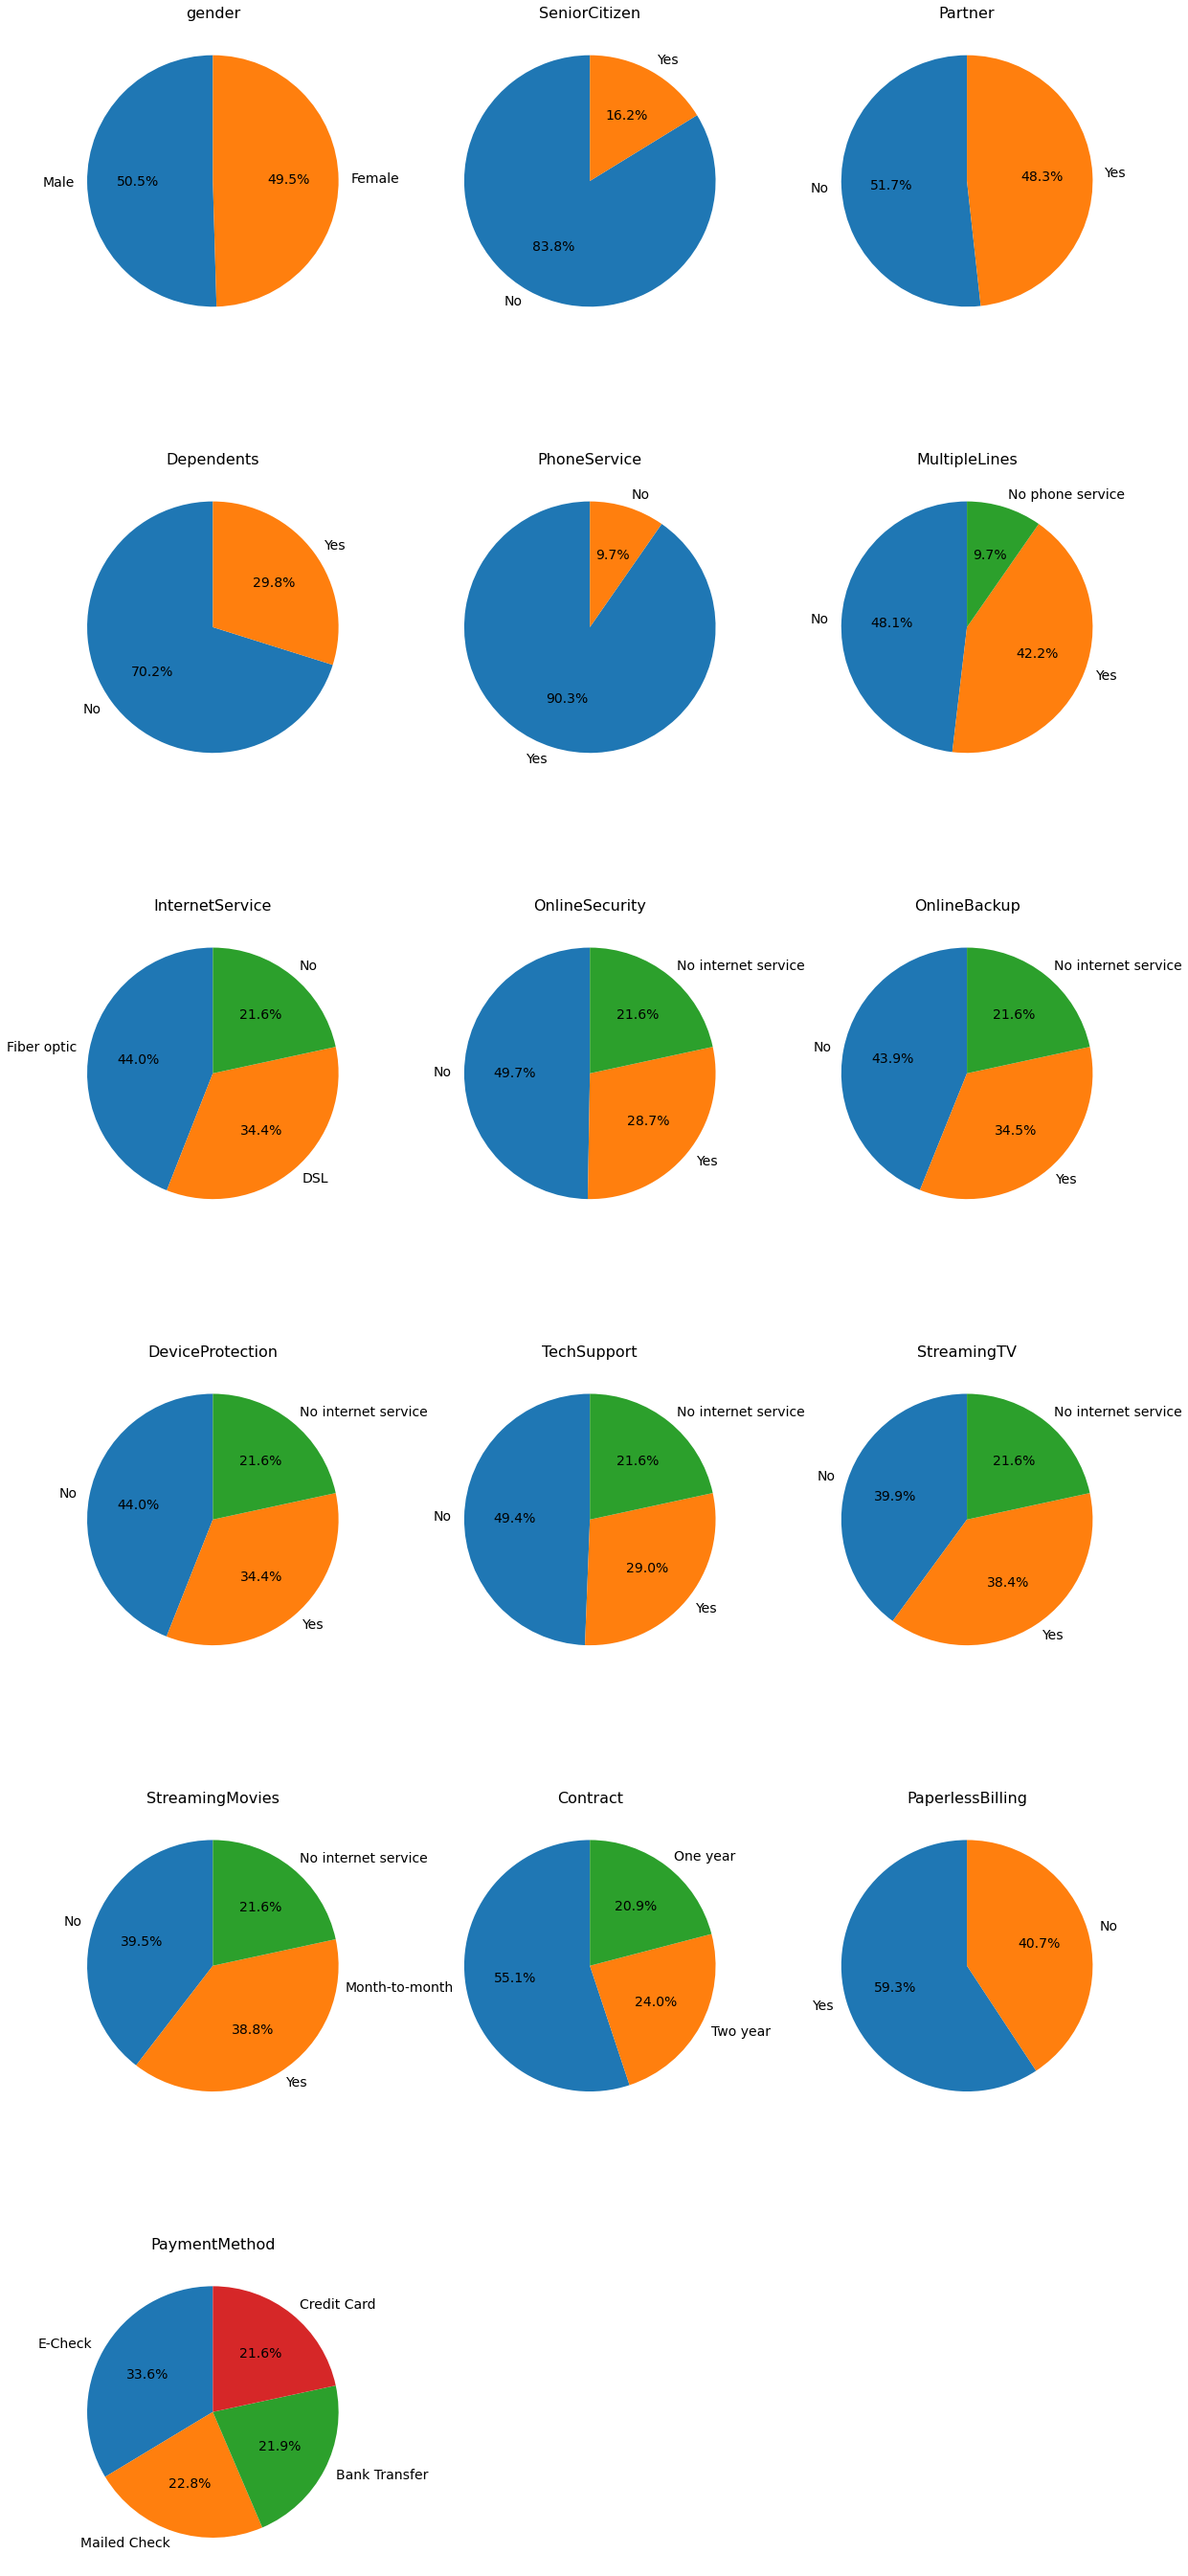

In [28]:
plt.figure(figsize=(20,50))
i = 0
for j in categoricalVar_List_copy:
    plt.subplot(6,3, i+1)
    plt.pie(data[j].value_counts(), labels = data[j].value_counts().index, startangle = 90, autopct='%1.1f%%', textprops={'fontsize' : 14})
    plt.title(f'{j}', fontsize = 16)
    i+=1

### Distribution of Numerical Features

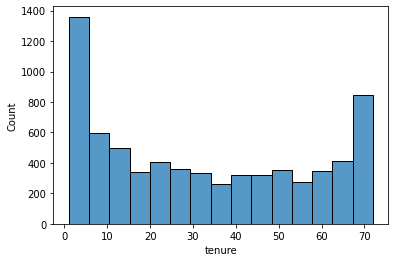

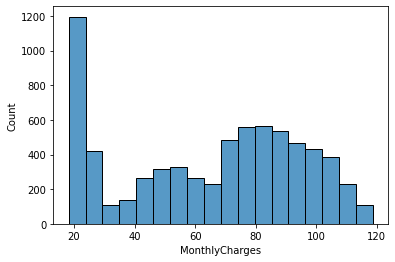

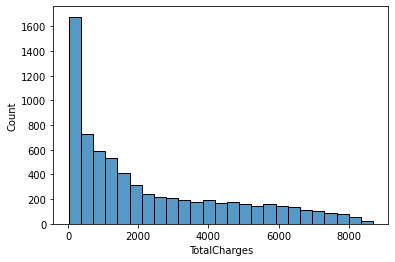

In [29]:
for i, j in enumerate(numericalVar_List):
    plt.figure(i)
    sns.histplot(x = j, data = data)

### Distributon of Target Variable/ Class Attribute

Target Variable/ Class Attribute - Churn

In [30]:
data["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

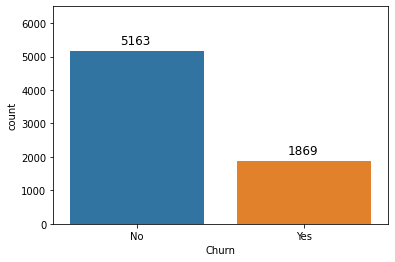

In [31]:
ax = sns.countplot(x = "Churn", data = data)
plt.ylim(0, 6500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+200), fontsize = 12)

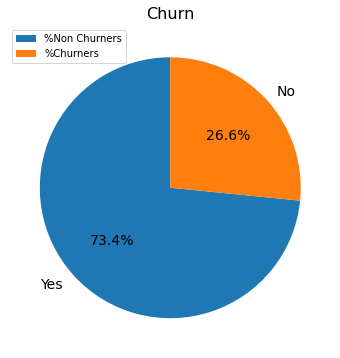

In [32]:
plt.figure(figsize=(8,6))
plt.pie(data["Churn"].value_counts(), labels = ['Yes','No'], startangle = 90, autopct='%1.1f%%', textprops={'fontsize' : 14})
plt.title("Churn", fontsize = 16)
plt.legend(labels = ['%Non Churners', '%Churners'])
plt.show() 

<b><u>Plot insights:</u></b><br>
Non Churners - 73.4%<br>
Churners - 26.6%<br>
Ratio = 73:27<br>
We have a highly imbalanced dataset.

### Distribution of Categorical Features According to 'Churn'

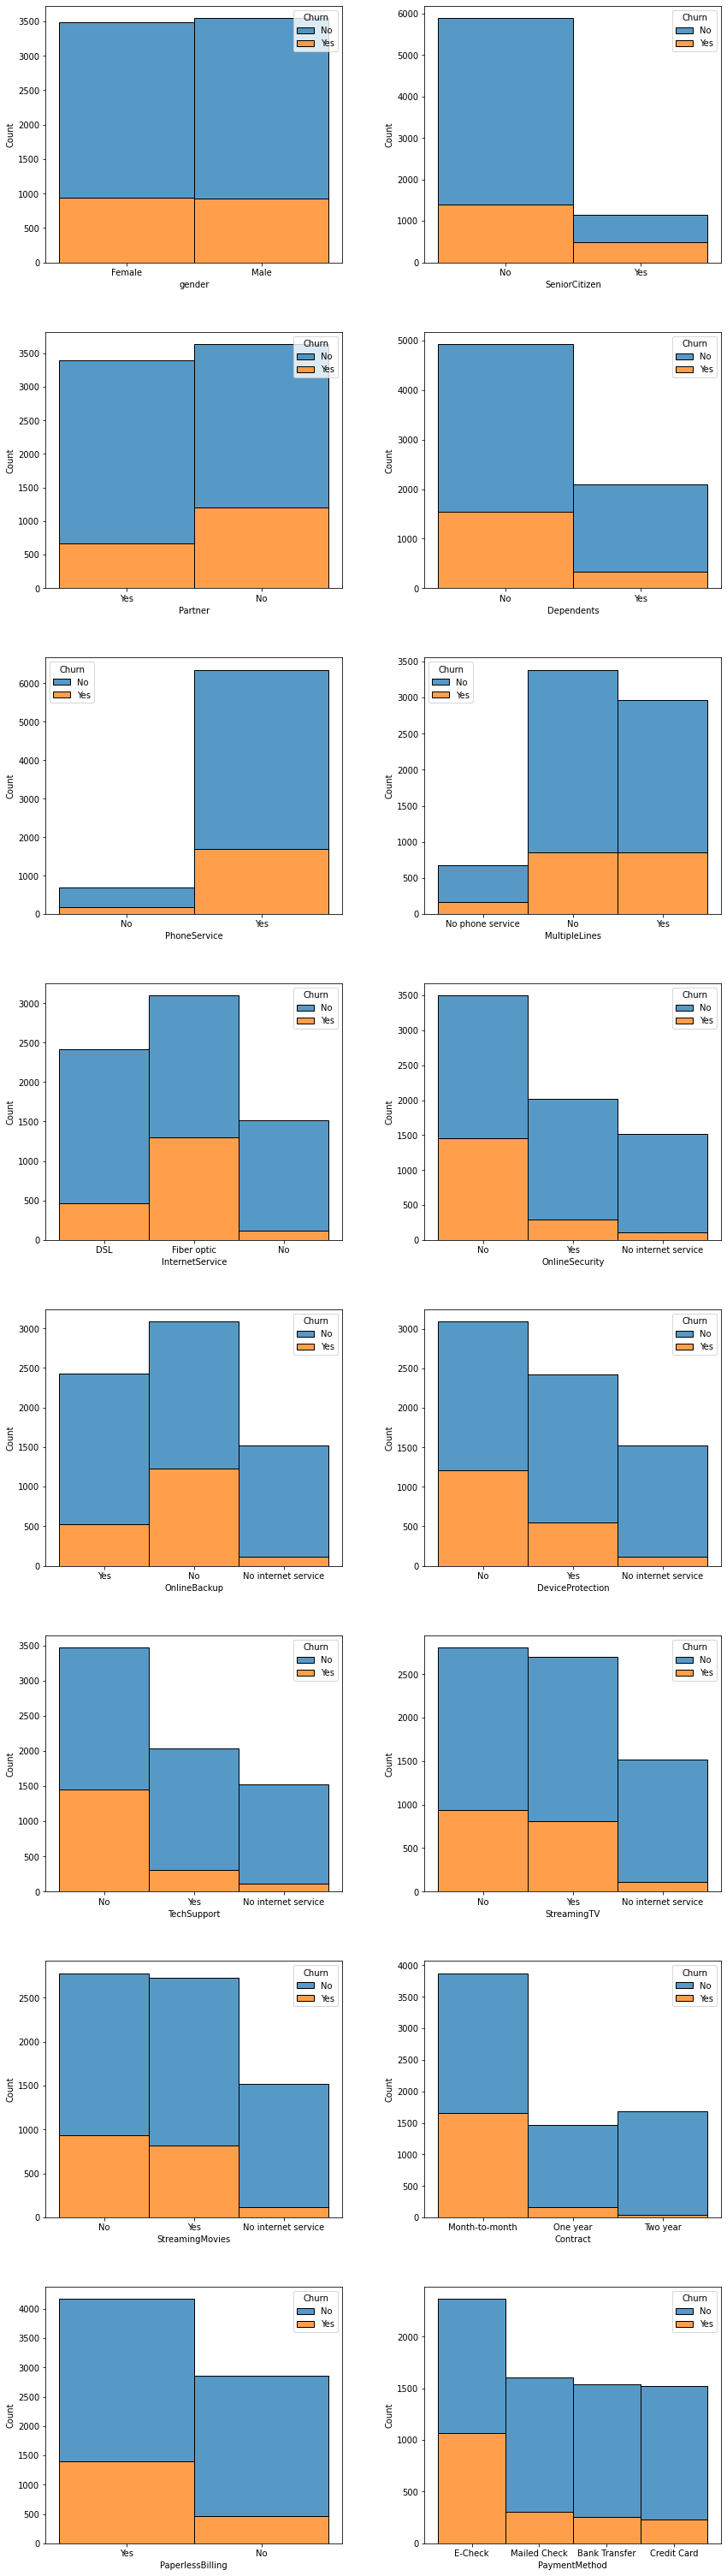

In [33]:
plt.figure(figsize = (13,43))
for i, j in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.subplot(8,2,i + 1)
    ax = sns.histplot(x = j, hue = 'Churn', data = data, multiple = "stack")
    plt.tight_layout(pad = 5.0)

<b><u>Plot insights:</u></b>
<li> Both genders have an equal churn rate.</li>
<li> Churn rate of Non Senior Citizens are much higher.</li>
<li> Single customers are more likely to churn than customers with partners.</li>
<li> Customers without any dependents are most likely to churn than customers with dependents.</li>
<li> High churn rate for customers with Phone Service.</li>
<li> Equal churn rate for customers with or without Multiple Lines.</li>
<li> Customers with Fiber Optic Internet Service has a high churn rate when compared to DSL and No Internet Service customers. This might suggest a dissatisfaction with this type of internet service.</li>
<li> Customers without Online Security are most likely to churn.</li>
<li> Customers without Online Backup are most likely to churn.</li>
<li> Customers without Device Protection are most likely to churn.</li>
<li> Customers without Tech Support has a higher churn rate.</li>
<li> Customers without Streaming TV service are most likely to churn.</li>
<li> Customers without Streaming Movies service are most likely to churn.</li>
<li> Notably higher churn rate can be seen from customers with Month-to-Month Contracts. </li>
<li> Customers with Paperless Billing are most likely to churn.</li>
<li> Electronic Check Payment method has a high churn rate than other payment methods.</li>

### Distribution of Numerical Features According to 'Churn'

#### Tenure

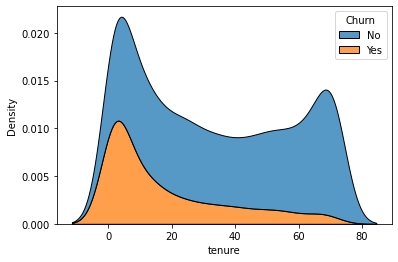

In [34]:
ax = sns.kdeplot(data=data, x= data["tenure"], hue=data["Churn"], multiple="stack")

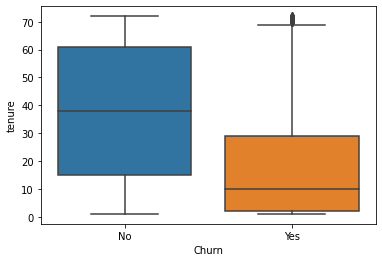

In [35]:
ax = sns.boxplot(x = data["Churn"], y = data["tenure"], data = data)

<b><u>Plot insights:</u></b>
<li>Churning customers have much lower tenure (median of ca. 10 months) compared to non-churners (median of ca. 38 months).</li>
<li>New customers are most likely to churn.</li>

#### Monthly Charges

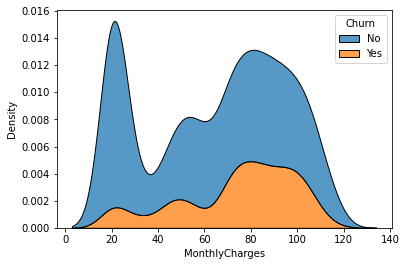

In [36]:
ax = sns.kdeplot(data=data, x= data["MonthlyCharges"], hue=data["Churn"], multiple="stack")

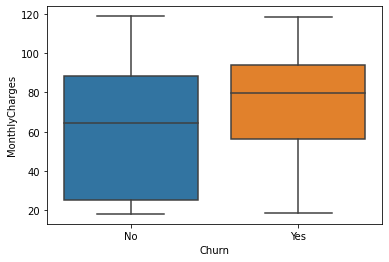

In [37]:
ax = sns.boxplot(x = data["Churn"], y = data["MonthlyCharges"], data = data)

<b><u>Plot insights:</u></b>
<li>Churning customers have higher monthly charges (median of ca. 80 USD) compared to that of non-churners (median of ca. 65 USD).</li>

#### Total Charges

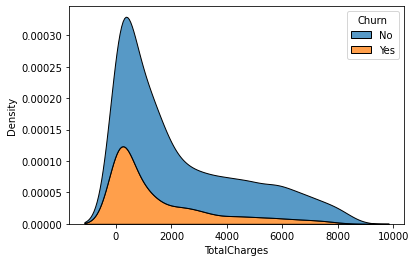

In [38]:
ax = sns.kdeplot(data=data, x= data["TotalCharges"], hue=data["Churn"], multiple="stack")

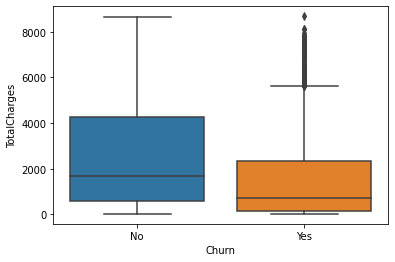

In [39]:
ax = sns.boxplot(x = data["Churn"], y = data["TotalCharges"], data = data)

<b><u>Plot insights:</u></b>
<li>Surprisingly churn rate is higher when Total Charges are lower.</li>

<b><u>Conclusion:</u></b><br>
TotalCharges is calculated using tenure and MonthlyCharges.
TotalCharges = tenure * MonthlyCharges

So when we compare the insights of the 3 numerical features => high MonthlyCharge at low tenure, results a low TotalCharge. Therefore, <b>High MonthlyCharge</b>, <b>Low tenure</b>, and <b>Low TotalCharge</b> results a <b>High Churn Rate</b>.


### Data Binning - Tenure Attribute

In [40]:
data["tenure"].nunique()

72

In [41]:
data["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

The tenure attribute has 72 unique values. So analyzing the data on the tenure attribute can be hectic due to the large number of records. Therefore, to gain a clear insight of the tenure attribute let's divide it into bins.

In [42]:
# Let's make a copy of our dataframe and make changes to the copied dataframe
data_copy = data.copy()

In [43]:
# Get the maximum tenure - 72 months
print(data_copy['tenure'].max())

72


In [44]:
# Grouping the tenure in bins of 12 months - equal width binning
labels = ["{0} - {1}".format(i, i + 12) for i in range(0, 72, 12)]
bins = [*range(0,73,12)] # * argument unpacking operator
print(labels)
print(bins)
data_copy['Tenure Period'] = pd.cut(data_copy["tenure"], bins = bins, labels = labels)

['0 - 12', '12 - 24', '24 - 36', '36 - 48', '48 - 60', '60 - 72']
[0, 12, 24, 36, 48, 60, 72]


In [45]:
data_copy['Tenure Period'].value_counts()

0 - 12     2175
60 - 72    1407
12 - 24    1024
24 - 36     832
48 - 60     832
36 - 48     762
Name: Tenure Period, dtype: int64

In [46]:
data_copy.drop(columns = ['tenure'], axis = 1, inplace = True)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Period
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,0 - 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No,24 - 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes,0 - 12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No,36 - 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0 - 12


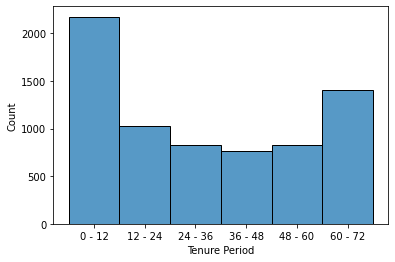

In [47]:
ax = sns.histplot(x = data_copy['Tenure Period'], data = data)

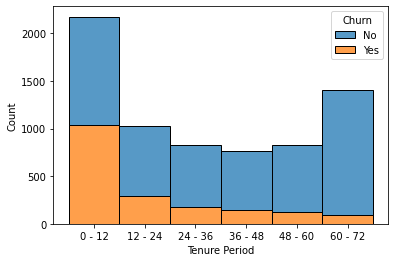

In [48]:
ax = sns.histplot(x = data_copy["Tenure Period"], hue = 'Churn', data = data_copy, multiple = "stack")

<b><u>Plot insights:</u></b><br>
Majority of the customers who had been a customer for a year or less churned. High churn rate within the first year suggests that the service offered does not meet the expectations of the new customers.

In [49]:
# Convert Churn to a binary numerical variable (Yes = 1 No = 0)
churn_column = {"No" : 0, "Yes" : 1}
data_copy["Churn"].replace(churn_column, inplace = True)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Period
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,0,0 - 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,0,24 - 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,1,0 - 12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,0,36 - 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,1,0 - 12


#### Convert categorical variable to numerical variables

In [50]:
gender_column = {"Female" : 0, "Male" : 1}
data_copy["gender"].replace(gender_column, inplace = True)

yesNo_list = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for i in yesNo_list:
    yn_column = {"No" : 0, "Yes" : 1}
    data_copy[i].replace(yn_column, inplace = True)

data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Period
0,0,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,E-Check,29.85,29.85,0,0 - 12
1,1,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed Check,56.95,1889.50,0,24 - 36
2,1,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed Check,53.85,108.15,1,0 - 12
3,1,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank Transfer,42.30,1840.75,0,36 - 48
4,0,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,E-Check,70.70,151.65,1,0 - 12


### One-Hot Encoding - Using Pandas get_dummies function

In [51]:
# Converting remaining categorical variables into dummy variables
data_copy = pd.get_dummies(data_copy)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Tenure Period_0 - 12,Tenure Period_12 - 24,Tenure Period_24 - 36,Tenure Period_36 - 48,Tenure Period_48 - 60,Tenure Period_60 - 72
0,0,0,1,0,0,1,29.85,29.85,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,0,56.95,1889.50,0,1,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,1,1,53.85,108.15,1,1,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,42.30,1840.75,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,70.70,151.65,1,1,...,0,0,1,0,1,0,0,0,0,0


In [52]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                7032 non-null   int64  
 1   SeniorCitizen                         7032 non-null   int64  
 2   Partner                               7032 non-null   int64  
 3   Dependents                            7032 non-null   int64  
 4   PhoneService                          7032 non-null   int64  
 5   PaperlessBilling                      7032 non-null   int64  
 6   MonthlyCharges                        7032 non-null   float64
 7   TotalCharges                          7032 non-null   float64
 8   Churn                                 7032 non-null   int64  
 9   MultipleLines_No                      7032 non-null   uint8  
 10  MultipleLines_No phone service        7032 non-null   uint8  
 11  MultipleLines_Yes

In [53]:
# Now we will look at the correlation of all the attribuites with the expected class attribuite (Churn)
corr_matrix = data_copy.corr()

In [54]:
corr_Churn = corr_matrix["Churn"].sort_values(ascending = False)
corr_Churn

Churn                                   1.000000
Contract_Month-to-month                 0.404565
OnlineSecurity_No                       0.342235
TechSupport_No                          0.336877
Tenure Period_0 - 12                    0.319628
InternetService_Fiber optic             0.307463
PaymentMethod_E-Check                   0.301455
OnlineBackup_No                         0.267595
DeviceProtection_No                     0.252056
MonthlyCharges                          0.192858
PaperlessBilling                        0.191454
SeniorCitizen                           0.150541
StreamingMovies_No                      0.130920
StreamingTV_No                          0.128435
StreamingTV_Yes                         0.063254
StreamingMovies_Yes                     0.060860
MultipleLines_Yes                       0.040033
Tenure Period_12 - 24                   0.019929
PhoneService                            0.011691
gender                                 -0.008545
MultipleLines_No pho

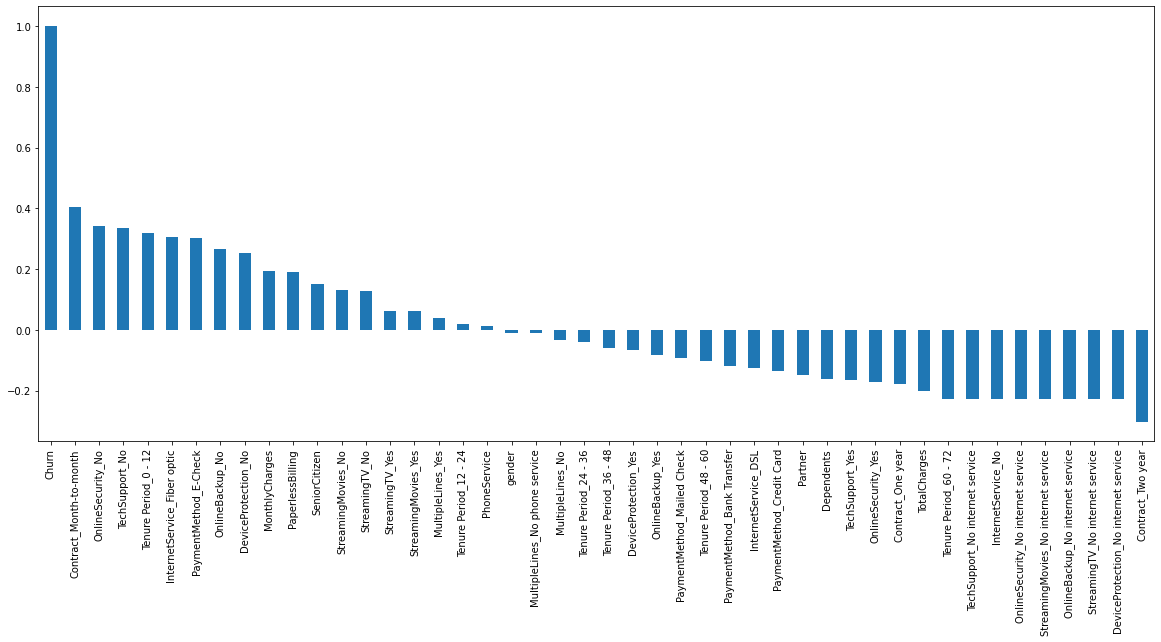

In [55]:
plt.figure(figsize=(20,8))
ax = corr_Churn.plot(kind='bar')

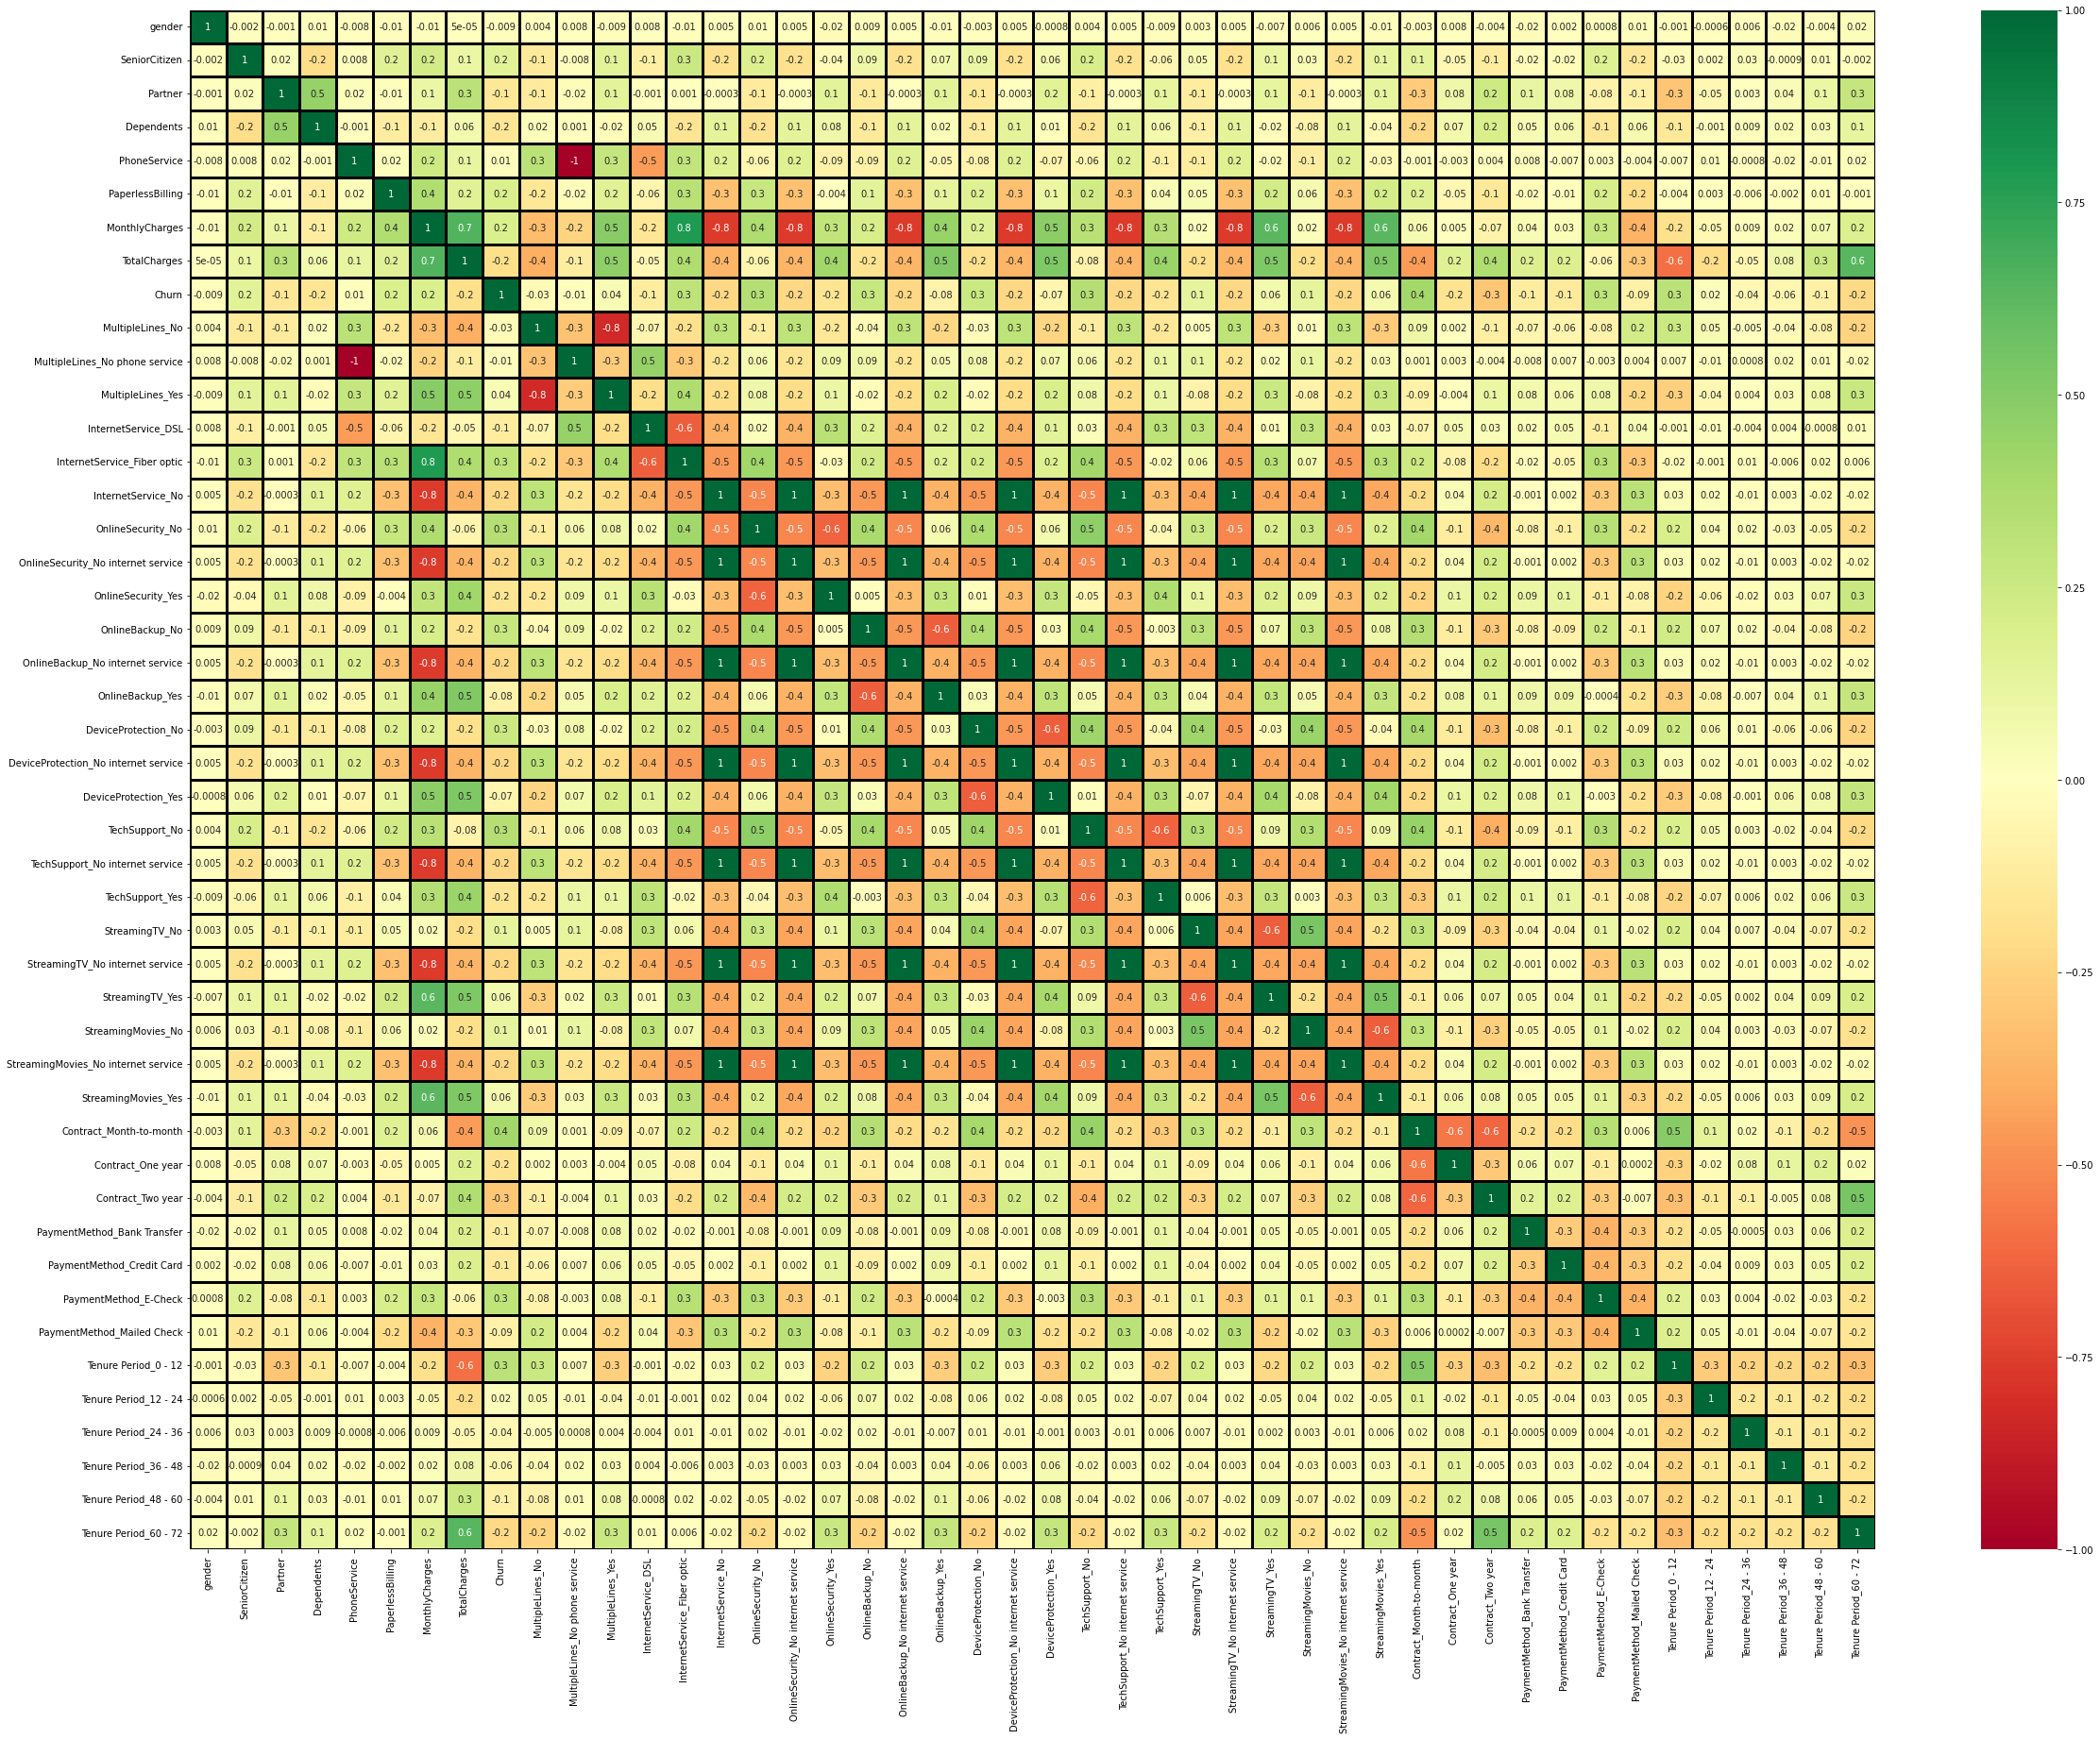

In [56]:
plt.figure(figsize = (40, 30))
ax = sns.heatmap(corr_matrix, annot = True, fmt='.1g', vmin = -1, vmax = 1, cmap="RdYlGn", linewidths = 3, linecolor = 'black', annot_kws={'size': 10})

<b><u>Plot Insight:</u></b>
<li><b>High Churn</b> - Month to month contracts, No online security, No Tech support, First year of subscriptions (Tenure period 0-12), Fibre Optics Internet, and Electronic Check Payments. </li>

<li><b>Low Churn</b> - 2-year contracts, Subscriptions without internet service, and 5-6 years customers.</li>

<li>Factors with No impact on Churn - Gender, Availability of PhoneService, and number of multiple lines.</li>

## References 

Rashida Nasrin Sucky (Aug 27, 2020). Data Binning with Pandas Cut or Qcut Method. When You Are Looking for a Range Not an Exact Value, a Grade Not a Score. https://towardsdatascience.com/sort-and-segment-your-data-into-bins-to-get-sorted-ranges-pandas-cut-and-qcut-7785931bbfde

B. Chen (Jun 18, 2020). What is One-Hot Encoding and how to use Pandas get_dummies function. A complete One-Hot Encoding tutorial for beginners. https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970

Okoh Anita (Aug 20, 2019). Seaborn Heatmaps: 13 Ways to Customize Correlation Matrix Visualizations. https://heartbeat.comet.ml/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07